# Hashtag Hijacking Detection by Analysing Tweets' Relevance, Binary Classification

## Outline
- [ 1- Libraries](#1)
- [ 2- Dataset](#2)
  - [ 2.1  Description of the input data](#2.1)
  - [ 2.2  Exploratory Data Analysis](#2.2)
  - [ 2.3  Data Sampling](#2.3)
  - [ 2.4  Data Preprocessing](#2.4)
  - [ 2.5  Data Splitting](#2.5)
- [ 3- Model Implementation](#3)
  - [3.1 Count Vectorizer](#3.2)
    - [ 3.1.1 Logistic Regression](#3.1.1)
    - [ 3.1.2 K-nearest Neighbors](#3.1.2)
    - [ 3.1.3 Support Vector Machine](#3.1.3)
    - [ 3.1.4 Random Forest Classifier](#3.1.4)
    - [ 3.1.5 Extra Tree Classifier](#3.1.5)
    - [ 3.1.6 Gaussian Naive Bayes](#3.1.6)
    - [ 3.1.7 Multinomial Naive Bayes](#3.1.7)
    - [ 3.1.8 Gradient Boosting](#3.1.8)
    - [ 3.1.9 XG-boost Classifier](#3.1.9)
    - [ 3.1.10 Ada-boost Classifier](#3.1.10)
    - [ 3.1.11 MLPClassifier](#3.1.11)
    - [ 3.1.12 VotingClassifier](#3.1.12)
  - [3.2 TF-IDF Vectorizer](#3.2)
    - [ 3.2.1 Logistic Regression](#3.2.1)
    - [ 3.2.2 K-nearest Neighbors](#3.2.2)
    - [ 3.2.3 Support Vector Machine](#3.2.3)
    - [ 3.2.4 Random Forest Classifier](#3.2.4)
    - [ 3.2.5 Extra Tree Classifier](#3.2.5)
    - [ 3.2.6 Gaussian Naive Bayes](#3.2.6)
    - [ 3.2.7 Multinomial Naive Bayes](#3.2.7)
    - [ 3.2.8 Gradient Boosting](#3.2.8)
    - [ 3.2.9 XG-boost Classifier](#3.2.9)
    - [ 3.2.10 Ada-boost Classifier](#3.2.10)
    - [ 3.2.11 MLPClassifier](#3.2.11)
    - [ 3.2.12 VotingClassifier](#3.2.12)
- [ 4- Cumulative Evaluation](#4)
- [ 5- Conclusion](#5)

<a name="1"></a>
## 1 - Libraries 

First, let's run the cell below to import some required packages.
- [pandas](https://pandas.pydata.org/) a fast, powerful, flexible and easy to use open source data analysis and manipulation tools.
- [seaborn](https://seaborn.pydata.org/) a Python data visualization library for drawing attractive and informative statistical graphics.
- [numpy](https://numpy.org/) the core library for scientific computing in Python.
- [matplotlib](http://matplotlib.org) a popular library to plot graphs in Python.
- [time](https://docs.python.org/3/library/time.html) a library that provides various time-related functions.
- [pickle](https://docs.python.org/3/library/pickle.html) a library that converts a Python object into a byte stream to store it in a file/database, maintain program state across sessions, or transport data over the network.

In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import time
import pickle

<a name="2"></a>
## 2- Dataset

Start by reading the dataset for this code. 
- The dataset contains tweets labeled as 0=relevant or 1=irrelevant.

- The data set contains 9469 training examples, 8653 of them are irrelevant tweets.

- It contains the following features:
  - 'created_at' UTC time in which this Tweet was created.
  - 'full-text' the tweet full text.
  - 'screan_name' the username of the tweeter.
  - 'followers_count' the number of followers this user has.
  - 'following_count' the number of accounts this user is following. 
  - 'rtweet_count' the number of times this Tweet has been retweeted. 
  - 'favorites_count' the number of times this Tweet has been liked by other Twitter users.
  - 'Hashtag' the hashatg in which the tweet was posted with.
  - 'res' indicates whether the tweet is relevant to the hashtag it is posted with or not. It takes value 1 in case of irrelevant and 0 otherwise.

In [4]:
Dataset = pd.read_csv('FinalDataset.csv')
Dataset.head()

,Unnamed: 0,created_at,res,full_text,screen_name,followers_count,friends_count,retweet_count,favorite_count,Hashtag
0,1488,Thu Apr 01 17:29:15 +0000 2021,1,RT @IgnacioDiMeglio: THE REAL SHOWDOWN IS HERE...,IgnacioDiMeglio,397,804,5.0,0.0,godzillavskong
1,1808,Tue Mar 23 17:03:29 +0000 2021,1,"RT @ankush_prashar: On #ShaheedDiwas, great sa...",atuverma1,89,28,3.0,0.0,MartyrsDay
2,733,Fri Mar 26 04:56:26 +0000 2021,0,RT @MANJULtoons: #GNCTDBill\nMy #cartoon for @...,seemamarch1,252,466,170.0,0.0,GNCTDBill
3,111,Mon Mar 22 03:33:35 +0000 2021,1,"RT @Nadeshot: Wow, #SnydersCut Justice League ...",JeniusKuya,71,674,392.0,0.0,snyderscut
4,873,Wed Mar 31 04:44:38 +0000 2021,1,RT @rishabh_memes: #instagramdown \nAfter goin...,wtf_ankur,2484,1335,69.0,69.0,instagramdown


<a name="2.1"></a>
### 2.1  Description of the input data

Here we can see the data Types & Shape

In [5]:
#Dataset = Dataset.iloc[:,:] ???
print("Dataset Data Types:\n",Dataset.dtypes)
print("\n\nDataset Shape: ", Dataset.shape)

Dataset Data Types:
 Unnamed: 0           int64
created_at          object
res                  int64
full_text           object
screen_name         object
followers_count      int64
friends_count        int64
retweet_count      float64
favorite_count     float64
Hashtag             object
dtype: object


Dataset Shape:  (9469, 10)


### Transform from a Pandas dataframe into a Numpy array

In [6]:
# Transform from a Pandas dataframe into a Numpy array
DatasetNp = Dataset.to_numpy()
DatasetNp[:,8] = DatasetNp[:,8].astype('i')
print(DatasetNp.shape)


# assign the tweets to X, and the labels to Y
X, y = DatasetNp[:,3],DatasetNp[:,2]
print(X.shape)
print(y.shape)
print(X[:5])
print(y[:5])



Xn = []
yn = []
for i in range(len(X)):
  if((y[i] == 0 or y[i] == 1) and int(y[i]) >= 2):
    continue
  else:
    Xn.append(X[i])
    yn.append(y[i])

X = np.array(Xn); y = np.array(yn);
print(X.shape)
print(y.shape)
print(X[:5])
print(y[:5])

(9469, 10)
(9469,)
(9469,)
['RT @IgnacioDiMeglio: THE REAL SHOWDOWN IS HERE! #GodzillaVsKong is a thing of the past. It´s time for #Killeroo Vs #GorillaMyDreams. Killer…'
 'RT @ankush_prashar: On #ShaheedDiwas, great salute to our martyrs #BhagatSingh #Sukhdev &amp; #Rajguru who laid down their lives for the freedo…'
 'RT @MANJULtoons: #GNCTDBill\nMy #cartoon for @firstpost\nTelegram: https://t.co/0zuidcPdqY https://t.co/AAD6fyoaaR'
 'RT @Nadeshot: Wow, #SnydersCut Justice League was absolutely phenomenal. Well worth the wait, all my expectations for the film were blown a…'
 'RT @rishabh_memes: #instagramdown \nAfter going down Instagram coming back online be like : https://t.co/jqrPyNmtHe']
[1 1 0 1 1]
(9469,)
(9469,)
['RT @IgnacioDiMeglio: THE REAL SHOWDOWN IS HERE! #GodzillaVsKong is a thing of the past. It´s time for #Killeroo Vs #GorillaMyDreams. Killer…'
 'RT @ankush_prashar: On #ShaheedDiwas, great salute to our martyrs #BhagatSingh #Sukhdev &amp; #Rajguru who laid down their li

<a name="2.2"></a>
### 2.2  Exploratory Data Analysis

2.2.1 Plotting Hashtags and their tweets relevance
- The figur below shows the number of relevant and irrelevant tweets in eache Hashtag.
- From the figure we can infer that all of the hashtags are hijacked.

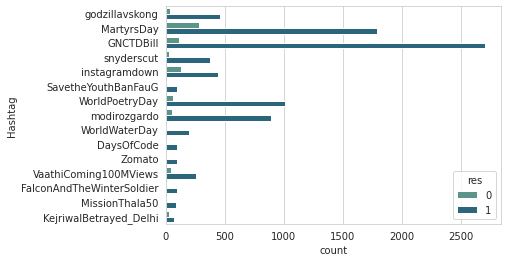

In [7]:
sns.set_style('whitegrid')
sns.countplot(y='Hashtag', hue='res', data=Dataset, palette='crest')

2.2.2 Correlation Heatmap
- The figur below shows the correlation between the features.
- From the figure we can infer that non of these features affect the relevance of a tweet to a hashtag.

Text(0.5, 1.0, 'General Correlation')

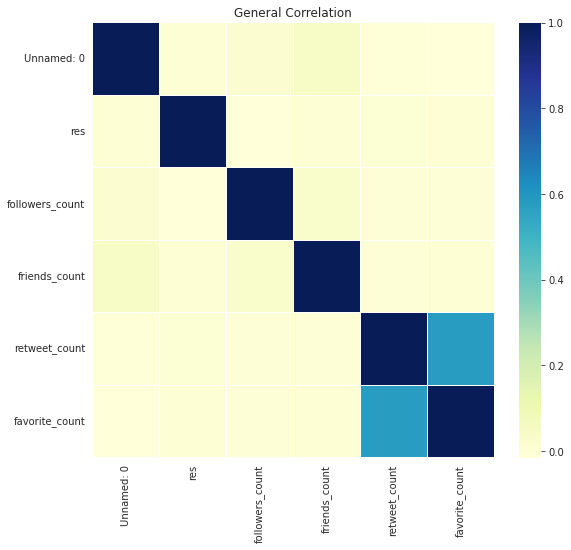

In [8]:
corr = Dataset.corr()
plt.subplots(figsize =(9, 8))
sns.heatmap(corr, cmap ="YlGnBu", linewidths = 0.1)
plt.title("General Correlation")

2.2.3 Plotting Class Frequency
- The plot below shows the number of 1=irrelevant and 0=relevant tweets in the dataset.
- From the plot below we can infer that the dataset is biased and has more irrelevant tweets than relevant tweets. This bias must be resolved.


1    8653
0     816
Name: 0, dtype: int64


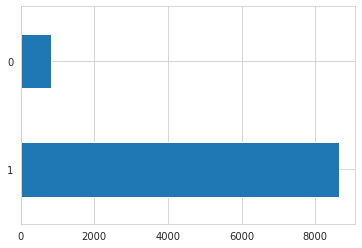

In [9]:
label = pd.DataFrame(y)
classFreq = label[0].value_counts()
print(classFreq)
classFreq.plot.barh()
plt.show()

<a name="2.3"></a>
### 2.3  Data Sampling

Resolve Bias by either runnibg oversampling OR undersampling code

#### 2.3.1 Oversampling
Duplicating the data samples of the minority class six times to create a more balanced dataset.

In [10]:
# RUN oversampling OR undersampling code to resolve biase
# Oversampling 

length = len(X)
Xn = []; yn = [];
for i in range(6):
  for i in range(length):
    if(y[i] == 0):
      yn.append(y[i])
      Xn.append(X[i])

for i in range(length):
  if(y[i] == 1):
    yn.append(y[i])
    Xn.append(X[i])

X = np.array(Xn); y = np.array(yn);

#### 2.3.2 Undersampling
Eliminating a portion of the majority class's examples to achieve balance in the dataset.

In [11]:
# To run this cell, remove """ above and below the code
# Undersamplling
"""
length = len(X)
Xn = []; yn = [];
for i in range(length):
   if(y[i] == 0):
     yn.append(y[i])
     Xn.append(X[i])

for i in range(4*len(Xn)+20):
   if(y[i] == 1):
     yn.append(y[i])
     Xn.append(X[i])

X = np.array(Xn); y = np.array(yn);
"""

'\nlength = len(X)\nXn = []; yn = [];\nfor i in range(length):\n   if(y[i] == 0):\n     yn.append(y[i])\n     Xn.append(X[i])\n\nfor i in range(4*len(Xn)+20):\n   if(y[i] == 1):\n     yn.append(y[i])\n     Xn.append(X[i])\n\nX = np.array(Xn); y = np.array(yn);\n'

1    8653
0    4896
Name: 0, dtype: int64


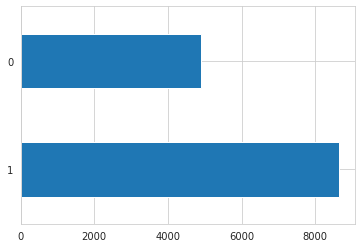

In [12]:
# Plotting class frequency after over/under sampling

label = pd.DataFrame(y)
classFreq = label[0].value_counts()
print(classFreq)
classFreq.plot.barh()
plt.show()

<a name="2.4"></a>
### 2.4  Data Preprocessing

The objective of the preprocessing step is to normalize the text into an appropriate form that machine learning algorithms can digest.

The applied preprocessing rules are: 
1. Removing punctuation and extra white space characters.
2. Converting the text into lowercase.
3. **Tokenization,** which splits the sentence into smaller units.
4. **Stop-words removal** such as a, an, and the.
5. **Lemmatization,** which groups different forms of a word togetherso they can be analysed as a single item.

In [13]:
import string
import glob
import nltk
nltk.download('omw-1.4')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))
def preprocessing(doc):
  puncd = {  }
  for i in string.punctuation:
    puncd[i] = ' '
  doc = doc.translate(str.maketrans(puncd))                        #replacing the punctuation marks with white spaces. 
  doc = doc.strip()                                                #removing the extra white space characters. 
  doc = doc.lower()                                                #making the string to lower case letters. 

  tokens = word_tokenize(doc)                                      #tokenise the words to a list. 
  tokens_NoStop = [i for i in tokens if i not in stop_words]       #removing the stop words from the tokenised list. 
  
  lemmatizer = WordNetLemmatizer()
  lemmedWordtext = []
  for i in range(len(tokens_NoStop)):
    lemmedWordtext.append(lemmatizer.lemmatize(tokens_NoStop[i]))  #appending the lemmatized word in the list
  return lemmedWordtext

Xnew = []
for i in range(len(X)):
  preProcessed = preprocessing(X[i])                               #preprocessing tweets one by one
  Xnew.append(preProcessed)                                        #appending the preprocessed tweet in the list

print(Xnew[:5])

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


[['rt', 'manjultoons', 'gnctdbill', 'cartoon', 'firstpost', 'telegram', 'http', 'co', '0zuidcpdqy', 'http', 'co', 'aad6fyoaar'], ['rt', 'saahilmenghani', 'number', 'shoot', 'farmersprotest', 'site', 'young', 'farmer', 'arrive', 'village', 'martyrsday', 'शहीद', 'दिवस', 'singhu…'], ['rt', 'saahilmenghani', 'number', 'shoot', 'farmersprotest', 'site', 'young', 'farmer', 'arrive', 'village', 'martyrsday', 'शहीद', 'दिवस', 'singhu…'], ['started', 'trending', 'pakistan', 'instagramdown', 'ufff', 'happiest', 'great', 'job', 'sheikh', 'nawaz', 'sharif', 'louis', 'tomlinson', 'selena', 'hayeee', 'trump', 'itne', 'china', 'islam', 'south', 'punjab', 'almighty', 'allah', 'dm', 'aray', 'bilkul'], ['create', 'modern', 'flat', 'modern', 'web', 'ui', 'illustration', 'design', 'website', 'mobile', 'app', 'feel', 'free', 'contact', 'http', 'co', 'jhnnf64zz2', 'web', 'illustration', 'flat', 'illustration', 'graphic', 'design', 'saweetie', 'marchmadness', 'instagramdown', 'colgate', 'freecodefridaycontest

<a name="2.5"></a>
### 2.5  Data Splitting

Splitting the data into train-test-split: 
- 67% for training. 
- 33% for trsting.

In [14]:
# Split the data into 77% training and 33% testing
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify = y, random_state=37)
print(X_train.shape)
print(X_test.shape)

(9077,)
(4472,)


<a name="3"></a>
## 3 - Model Implementation

Various machine learning methods are applied to detect hijacked hashtags based on tweets’ relevance. Each is used for both feature-generation techniques, count vectorizer and TF-IDF, to see which provides a higher accuracy.

The used Machine Learning methods are:
<ul type = "circle">  
  <li>Logistic Regression</li> 
  <li>K-nearest Neighbors</li>
  <li>Support Vector Machine</li>
  <li>Random Forest Classifier</li>
  <li>Extra Tree Classifier</li>
  <li>Gaussian Naive Bayes</li>
  <li>Multinomial Naive Bayes</li>
  <li>Gradient Boosting</li>
  <li>XG-boost Classifier</li>
  <li>Ada-boost Classifier</li>
  <li>MLPClassifier</li>
  <li>VotingClassifier</li>
</ul>

<a name="3.1"></a>
### 3.1 Count vectorizer

Count Vectorizer transforms a given text into a vector based on the frequency of each word that occurs in entire text.

In [15]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(tokenizer = preprocessing)
X_trainT = vectorizer.fit_transform(X_train)
features = vectorizer.get_feature_names()
print("No of features after vectorizing X_train:", len(features))
X_testT  = vectorizer.transform(X_test)
print("shape of X_trainT:", X_trainT.shape)
X_T = vectorizer.fit_transform(X)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


No of features after vectorizing X_train: 10685
shape of X_trainT: (9077, 10685)


<a name="3.1.1"></a>
**3.1.1 Logistic Regression**

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

y_train = y_train.astype('i')
y_test = y_test.astype('i')

LOGclf = LogisticRegression(random_state=0, n_jobs = -1, max_iter = 1000, verbose= 2)
t0 = time.time()
LOGclf.fit(X_trainT, y_train)
print("\n\nTraining time:", time.time()-t0)

t0 = time.time()
y_pred = LOGclf.predict(X_testT)
print("Testing  time:", time.time()-t0,"\n\n")

#Model Evaluation
print("Confusion Matrix:\n",confusion_matrix(y_test, y_pred),'\n')
print(classification_report(y_test,y_pred),'\n')
print("Testing accuracy --> ",accuracy_score(y_test, y_pred),'\n')

#saving model then reading it again
pickle.dump(LOGclf, open('LOGclfModel.sav', 'wb'))
LOGclf = pickle.load(open('LOGclfModel.sav', 'rb'))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.




Training time: 1.2823476791381836
Testing  time: 0.00182342529296875 


Confusion Matrix:
 [[1580   36]
 [  62 2794]] 

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1616
           1       0.99      0.98      0.98      2856

    accuracy                           0.98      4472
   macro avg       0.97      0.98      0.98      4472
weighted avg       0.98      0.98      0.98      4472
 

Testing accuracy -->  0.9780858676207513 



[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    1.2s finished


<a name="3.1.2"></a>
**3.1.2 K-nearest Neighbors**

In [17]:
from sklearn.neighbors import KNeighborsClassifier

KNNclf = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski',n_jobs = -1)
t0 = time.time()
KNNclf.fit(X_trainT, y_train)
print("\n\nTraining time:", time.time()-t0)

t0 = time.time()
y_pred = KNNclf.predict(X_testT)
print("Testing  time:", time.time()-t0,"\n\n")

#Model Evaluation
print("Confusion Matrix:\n",confusion_matrix(y_test, y_pred),'\n')
print(classification_report(y_test,y_pred),'\n')
print("Testing accuracy --> ",accuracy_score(y_test, y_pred),'\n')

#saving model then reading it again
pickle.dump(KNNclf, open('KNNclfModel.sav', 'wb'))
KNNclf = pickle.load(open('KNNclfModel.sav', 'rb'))



Training time: 0.002879619598388672
Testing  time: 4.201925992965698 


Confusion Matrix:
 [[1556   60]
 [ 262 2594]] 

              precision    recall  f1-score   support

           0       0.86      0.96      0.91      1616
           1       0.98      0.91      0.94      2856

    accuracy                           0.93      4472
   macro avg       0.92      0.94      0.92      4472
weighted avg       0.93      0.93      0.93      4472
 

Testing accuracy -->  0.9279964221824687 



<a name="3.1.3"></a>
**3.1.3 Support Vector Machine**

In [18]:
from sklearn.svm import SVC

SVMclf = SVC(probability=False,random_state=1, kernel='rbf')
t0 = time.time()
SVMclf.fit(X_trainT, y_train)
print("\n\nTraining time:", time.time()-t0)

t0 = time.time()
y_pred = SVMclf.predict(X_testT)
print("Testing  time:", time.time()-t0,"\n\n")

#Model Evaluation
print("Confusion Matrix:\n",confusion_matrix(y_test, y_pred),'\n')
print(classification_report(y_test,y_pred),'\n')
print("Testing accuracy --> ",accuracy_score(y_test, y_pred),'\n')

#saving model then reading it again
pickle.dump(SVMclf, open('SVMclfModel.sav', 'wb'))
SVMclf = pickle.load(open('SVMclfModel.sav', 'rb'))



Training time: 3.782618284225464
Testing  time: 1.949458122253418 


Confusion Matrix:
 [[1570   46]
 [  49 2807]] 

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1616
           1       0.98      0.98      0.98      2856

    accuracy                           0.98      4472
   macro avg       0.98      0.98      0.98      4472
weighted avg       0.98      0.98      0.98      4472
 

Testing accuracy -->  0.9787567084078712 



<a name="3.1.4"></a>
**3.1.4 Random Forest Classifier**

In [19]:
from sklearn.ensemble import RandomForestClassifier

RFclf = RandomForestClassifier(max_depth = 39, bootstrap = True, n_estimators = 1000, criterion = 'gini', random_state = 1,n_jobs = -1, verbose = 1)
t0 = time.time()
RFclf.fit(X_trainT, y_train)
print("\n\nTraining time:", time.time()-t0)

t0 = time.time()
y_pred = RFclf.predict(X_testT)
print("Testing  time:", time.time()-t0,"\n\n")

#Model Evaluation
print("Confusion Matrix:\n",confusion_matrix(y_test, y_pred),'\n')
print(classification_report(y_test,y_pred),'\n')
print("Testing accuracy --> ",accuracy_score(y_test, y_pred),'\n')

#saving model then reading it again
pickle.dump(RFclf, open('RFclfModel.sav', 'wb'))
RFclf = pickle.load(open('RFclfModel.sav', 'rb'))

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:    7.9s
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:   12.9s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:   15.8s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.2s




Training time: 16.106353044509888


[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    0.4s
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:    0.9s
[Parallel(n_jobs=2)]: Done 1000 out of 1000 | elapsed:    1.2s finished


Testing  time: 1.157278299331665 


Confusion Matrix:
 [[1305  311]
 [  30 2826]] 

              precision    recall  f1-score   support

           0       0.98      0.81      0.88      1616
           1       0.90      0.99      0.94      2856

    accuracy                           0.92      4472
   macro avg       0.94      0.90      0.91      4472
weighted avg       0.93      0.92      0.92      4472
 

Testing accuracy -->  0.9237477638640429 



<a name="3.1.5"></a>
**3.1.5 Extra Tree Classifier**

In [20]:
from sklearn.ensemble import ExtraTreesClassifier

ETclf = ExtraTreesClassifier(max_depth = 39, bootstrap = True, n_estimators = 1000, criterion = 'gini', random_state = 1,n_jobs = -1, verbose = 1)
t0 = time.time()
ETclf.fit(X_trainT, y_train)
print("\n\nTraining time:", time.time()-t0)

t0 = time.time()
y_pred = ETclf.predict(X_testT)
print("Testing  time:", time.time()-t0,"\n\n")

#Model Evaluation
print("Confusion Matrix:\n",confusion_matrix(y_test, y_pred),'\n')
print(classification_report(y_test,y_pred),'\n')
print("Testing accuracy --> ",accuracy_score(y_test, y_pred),'\n')

#saving model then reading it again
pickle.dump(ETclf, open('ETclfModel.sav', 'wb'))
ETclf = pickle.load(open('ETclfModel.sav', 'rb'))

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:    6.6s
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:   11.2s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:   17.1s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.1s




Training time: 17.63580060005188


[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.4s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    0.6s
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:    1.0s
[Parallel(n_jobs=2)]: Done 1000 out of 1000 | elapsed:    1.5s finished


Testing  time: 1.499636173248291 


Confusion Matrix:
 [[1249  367]
 [  28 2828]] 

              precision    recall  f1-score   support

           0       0.98      0.77      0.86      1616
           1       0.89      0.99      0.93      2856

    accuracy                           0.91      4472
   macro avg       0.93      0.88      0.90      4472
weighted avg       0.92      0.91      0.91      4472
 

Testing accuracy -->  0.9116726296958855 



<a name="3.1.6"></a>
**3.1.6 Gaussian Naive Bayes**

In [21]:
from sklearn.naive_bayes import GaussianNB

GNBclf = GaussianNB()
t0 = time.time()
GNBclf.fit(X_trainT.toarray(), y_train)
print("\n\nTraining time:", time.time()-t0)

t0 = time.time()
y_pred = GNBclf.predict(X_testT.toarray())
print("Testing  time:", time.time()-t0,"\n\n")

#Model Evaluation
print("Confusion Matrix:\n",confusion_matrix(y_test, y_pred),'\n')
print(classification_report(y_test,y_pred),'\n')
print("Testing accuracy --> ",accuracy_score(y_test, y_pred),'\n')

#saving model then reading it again
pickle.dump(GNBclf, open('GNBclfModel.sav', 'wb'))
GNBclf = pickle.load(open('GNBclfModel.sav', 'rb'))



Training time: 2.5956387519836426
Testing  time: 0.924663782119751 


Confusion Matrix:
 [[1616    0]
 [ 591 2265]] 

              precision    recall  f1-score   support

           0       0.73      1.00      0.85      1616
           1       1.00      0.79      0.88      2856

    accuracy                           0.87      4472
   macro avg       0.87      0.90      0.87      4472
weighted avg       0.90      0.87      0.87      4472
 

Testing accuracy -->  0.8678443649373881 



<a name="3.1.7"></a>
**3.1.7 Multinomial Naive Bayes**

In [22]:
from sklearn.naive_bayes import MultinomialNB

MNBclf = MultinomialNB(class_prior = [0.5, 0.5])
t0 = time.time()
MNBclf.fit(X_trainT, y_train)
print("\n\nTraining time:", time.time()-t0)

t0 = time.time()
y_pred = MNBclf.predict(X_testT)
print("Testing  time:", time.time()-t0,"\n\n")

#Model Evaluation
print("Confusion Matrix:\n",confusion_matrix(y_test, y_pred),'\n')
print(classification_report(y_test,y_pred),'\n')
print("Testing accuracy --> ",accuracy_score(y_test, y_pred),'\n')

#saving model then reading it again
pickle.dump(MNBclf, open('MNBclfModel.sav', 'wb'))
MNBclf = pickle.load(open('MNBclfModel.sav', 'rb'))



Training time: 0.007108211517333984
Testing  time: 0.0028023719787597656 


Confusion Matrix:
 [[1552   64]
 [ 124 2732]] 

              precision    recall  f1-score   support

           0       0.93      0.96      0.94      1616
           1       0.98      0.96      0.97      2856

    accuracy                           0.96      4472
   macro avg       0.95      0.96      0.95      4472
weighted avg       0.96      0.96      0.96      4472
 

Testing accuracy -->  0.9579606440071556 



<a name="3.1.8"></a>
**3.1.8 Gradient Boosting**

In [23]:
from sklearn.ensemble import GradientBoostingClassifier

GBclf = GradientBoostingClassifier(n_estimators=5000, learning_rate=0.2,max_depth=5, random_state=37, verbose = 1)
t0 = time.time()
GBclf.fit(X_trainT, y_train)
print("\n\nTraining time:", time.time()-t0)

t0 = time.time()
y_pred = GBclf.predict(X_testT)
print("Testing  time:", time.time()-t0,"\n\n")

#Model Evaluation
print("Confusion Matrix:\n",confusion_matrix(y_test, y_pred),'\n')
print(classification_report(y_test,y_pred),'\n')
print("Testing accuracy --> ",accuracy_score(y_test, y_pred),'\n')

#saving model then reading it again
pickle.dump(GBclf, open('GBclfModel.sav', 'wb'))
GBclf = pickle.load(open('GBclfModel.sav', 'rb'))

      Iter       Train Loss   Remaining Time 
         1           1.1470            3.21m
         2           1.0427            2.67m
         3           0.9663            2.52m
         4           0.9151            2.51m
         5           0.8701            2.45m
         6           0.8359            2.46m
         7           0.8004            2.46m
         8           0.7780            2.40m
         9           0.7477            2.39m
        10           0.7252            2.35m
        20           0.6153            2.14m
        30           0.5479            2.07m
        40           0.5021            2.00m
        50           0.4607            1.96m
        60           0.4272            1.94m
        70           0.4045            1.91m
        80           0.3836            1.89m
        90           0.3652            1.88m
       100           0.3468            1.87m
       200           0.2435            2.20m
       300           0.1941            1.99m
       40

<a name="3.1.9"></a>
**3.1.9 XG-boost Classifier**

In [24]:
from xgboost import XGBClassifier

XGBclf = XGBClassifier(max_depth = 15, n_estimators = 2000, n_jobs = -1,random_state=37, verbosity=1)
t0 = time.time()
XGBclf.fit(X_trainT, y_train)
print("\n\nTraining time:", time.time()-t0)

t0 = time.time()
y_pred = XGBclf.predict(X_testT)
print("Testing  time:", time.time()-t0,"\n\n")

#Model Evaluation
print("Confusion Matrix:\n",confusion_matrix(y_test, y_pred),'\n')
print(classification_report(y_test,y_pred),'\n')
print("Testing accuracy --> ",accuracy_score(y_test, y_pred),'\n')

#saving model then reading it again
pickle.dump(XGBclf, open('XGBclfModel.sav', 'wb'))
XGBclf = pickle.load(open('XGBclfModel.sav', 'rb'))



Training time: 179.21528029441833
Testing  time: 1.3950440883636475 


Confusion Matrix:
 [[1588   28]
 [  76 2780]] 

              precision    recall  f1-score   support

           0       0.95      0.98      0.97      1616
           1       0.99      0.97      0.98      2856

    accuracy                           0.98      4472
   macro avg       0.97      0.98      0.97      4472
weighted avg       0.98      0.98      0.98      4472
 

Testing accuracy -->  0.9767441860465116 



<a name="3.1.10"></a>
**3.1.10 Ada-boost Classifier**

In [25]:
from sklearn.ensemble import AdaBoostClassifier

ADBclf = AdaBoostClassifier(n_estimators=10000, random_state=37, learning_rate = 0.1, algorithm='SAMME')
t0 = time.time()
ADBclf.fit(X_trainT, y_train)
print("\n\nTraining time:", time.time()-t0)

t0 = time.time()
y_pred = ADBclf.predict(X_testT)
print("Testing  time:", time.time()-t0,"\n\n")

#Model Evaluation
print("Confusion Matrix:\n",confusion_matrix(y_test, y_pred),'\n')
print(classification_report(y_test,y_pred),'\n')
print("Testing accuracy --> ",accuracy_score(y_test, y_pred),'\n')

#saving model then reading it again
pickle.dump(ADBclf, open('ADBclfModel.sav', 'wb'))
ADBclf = pickle.load(open('ADBclfModel.sav', 'rb'))



Training time: 102.78447222709656
Testing  time: 7.161332845687866 


Confusion Matrix:
 [[1132  484]
 [  76 2780]] 

              precision    recall  f1-score   support

           0       0.94      0.70      0.80      1616
           1       0.85      0.97      0.91      2856

    accuracy                           0.87      4472
   macro avg       0.89      0.84      0.86      4472
weighted avg       0.88      0.87      0.87      4472
 

Testing accuracy -->  0.8747763864042933 



<a name="3.1.11"></a>
**3.1.11 MLPClassifier**

In [26]:
from sklearn.neural_network import MLPClassifier

MLPclf = MLPClassifier(batch_size = 512, early_stopping=True, hidden_layer_sizes=(256,128,64,32,16), random_state=37 ,max_iter=450, learning_rate_init=0.01, tol=0.0000001,n_iter_no_change = 20) #verbose = True
t0 = time.time()
MLPclf.fit(X_trainT, y_train)
print("\n\nTraining time:", time.time()-t0)

t0 = time.time()
y_pred = MLPclf.predict(X_testT)
print("Testing  time:", time.time()-t0,"\n\n")

#Model Evaluation
print("Confusion Matrix:\n",confusion_matrix(y_test, y_pred),'\n')
print(classification_report(y_test,y_pred),'\n')
print("Testing accuracy --> ",accuracy_score(y_test, y_pred),'\n')

#saving model then reading it again
pickle.dump(MLPclf, open('bestMLPModel.sav', 'wb'))
MLPclf = pickle.load(open('bestMLPModel.sav', 'rb'))



Training time: 64.0564591884613
Testing  time: 0.05327916145324707 


Confusion Matrix:
 [[1585   31]
 [  67 2789]] 

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1616
           1       0.99      0.98      0.98      2856

    accuracy                           0.98      4472
   macro avg       0.97      0.98      0.98      4472
weighted avg       0.98      0.98      0.98      4472
 

Testing accuracy -->  0.9780858676207513 



<a name="3.1.12"></a>
**3.1.12 VotingClassifier**

In [27]:
# 1
from sklearn.linear_model import LogisticRegression
LOGclf = LogisticRegression(random_state=0, n_jobs = -1, max_iter = 200, verbose= 1)

# 2
from sklearn.neighbors import KNeighborsClassifier
KNNclf = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski',n_jobs = -1)

# 3
from sklearn.svm import SVC
SVMclf = SVC(probability=False,random_state=1, kernel='rbf')

# 4
from sklearn.ensemble import RandomForestClassifier 
RFclf = RandomForestClassifier(max_depth = 39, bootstrap = True, n_estimators = 1000, criterion = 'gini', random_state = 1,n_jobs = -1, verbose = 1)

# 5
from sklearn.ensemble import ExtraTreesClassifier
ETclf = ExtraTreesClassifier(max_depth = 39, bootstrap = True, n_estimators = 1000, criterion = 'gini', random_state = 1,n_jobs = -1, verbose = 1)
#ETclf = ExtraTreesClassifier(max_depth = 39, bootstrap = True, n_estimators = 500, criterion = 'gini', n_jobs = -1,max_samples=0.8,max_features=6,random_state=37)

# 6
from sklearn.naive_bayes import MultinomialNB
MNBclf = MultinomialNB()

# 7
from sklearn.ensemble import GradientBoostingClassifier
GBclf = GradientBoostingClassifier(n_estimators=5000, learning_rate=0.2,max_depth=5, random_state=37, verbose = 1)

# 8
from xgboost import XGBClassifier
XGBclf = XGBClassifier(max_depth = 15, n_estimators = 10000, n_jobs = -1,random_state=37, verbosity=1)

# 9
from sklearn.ensemble import AdaBoostClassifier
ADBclf = AdaBoostClassifier(n_estimators=30000, random_state=37, learning_rate = 0.1, algorithm='SAMME')

# 10
from sklearn.neural_network import MLPClassifier
MLPclf = MLPClassifier(batch_size = 512, early_stopping=True, hidden_layer_sizes=(256,128,64,32,16), random_state=37 ,max_iter=450, learning_rate_init=0.01, tol=0.0000001,n_iter_no_change = 20) #verbose = True



from sklearn.ensemble import VotingClassifier

countVecclf = VotingClassifier(estimators=[('RFclf', RFclf),('ETclf', ETclf),('MLPclf', MLPclf),('LOGclf', LOGclf),('SVMclf', SVMclf), ('XGBclf', XGBclf),  ('ADBclf', ADBclf),('GBclf', GBclf),('MNBclf',MNBclf),('KNNclf',KNNclf)], voting='hard', weights=[1,1,2,2,2,2,1,2,2,1], flatten_transform=True)
t0 = time.time()
countVecclf.fit(X_trainT, y_train)
print("\n\nTraining time:", time.time()-t0)

t0 = time.time()
y_pred_countVec = countVecclf.predict(X_testT)
print("\n\nTesting  time:", time.time()-t0)

#Model Evaluation
print("Confusion Matrix:\n",confusion_matrix(y_test, y_pred),'\n')
print(classification_report(y_test,y_pred),'\n')
print("Testing accuracy --> ",accuracy_score(y_test, y_pred),'\n')

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 202 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:   17.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 300 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:   15.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.3s finished


      Iter       Train Loss   Remaining Time 
         1           1.1470            2.31m
         2           1.0427            2.19m
         3           0.9663            2.20m
         4           0.9151            2.17m
         5           0.8701            2.19m
         6           0.8359            2.17m
         7           0.8004            2.17m
         8           0.7780            2.17m
         9           0.7477            2.19m
        10           0.7252            2.18m
        20           0.6153            2.07m
        30           0.5479            2.03m
        40           0.5021            2.02m
        50           0.4607            1.98m
        60           0.4272            1.97m
        70           0.4045            1.93m
        80           0.3836            1.92m
        90           0.3652            1.90m
       100           0.3468            1.88m
       200           0.2435            1.77m
       300           0.1941            1.71m
       40

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:    0.6s
[Parallel(n_jobs=2)]: Done 1000 out of 1000 | elapsed:    0.8s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:    0.6s
[Parallel(n_jobs=2)]: Done 1000 out of 1000 | elapsed:    0.8s finished




Testing  time: 37.832536697387695
Confusion Matrix:
 [[1585   31]
 [  67 2789]] 

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1616
           1       0.99      0.98      0.98      2856

    accuracy                           0.98      4472
   macro avg       0.97      0.98      0.98      4472
weighted avg       0.98      0.98      0.98      4472
 

Testing accuracy -->  0.9780858676207513 



In [28]:
countVecclf.fit(X_T, y)

#saving model then reading it again
pickle.dump(countVecclf, open('finalBestModel.sav', 'wb'))
countVecclf = pickle.load(open('finalBestModel.sav', 'rb'))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 122 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done 722 tasks      | elapsed:   20.7s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:   28.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 164 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 764 tasks      | elapsed:   16.5s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:   21.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.4s finished


      Iter       Train Loss   Remaining Time 
         1           1.1473            2.98m
         2           1.0429            2.91m
         3           0.9674            2.88m
         4           0.9163            2.86m
         5           0.8702            2.87m
         6           0.8363            2.89m
         7           0.8019            2.89m
         8           0.7658            2.90m
         9           0.7483            2.89m
        10           0.7290            2.89m
        20           0.6243            2.74m
        30           0.5525            2.67m
        40           0.5055            2.64m
        50           0.4663            2.59m
        60           0.4348            2.54m
        70           0.4070            2.53m
        80           0.3819            2.51m
        90           0.3659            2.48m
       100           0.3450            2.49m
       200           0.2473            2.73m
       300           0.1958            2.55m
       40

<a name="3.2"></a>
### 3.2 TF-IDF Vectorizer

**TF-IDF vectorizer** is a statistical measure that evaluates how relevant a word is to a document in a collection of documents.

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(tokenizer = preprocessing)
X_trainT = vectorizer.fit_transform(X_train)
features = vectorizer.get_feature_names()
print("No of features after vectorizing X_train:", len(features))
X_testT  = vectorizer.transform(X_test)
print("shape of X_trainT:", X_trainT.shape)
X_T = vectorizer.fit_transform(X)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


No of features after vectorizing X_train: 10685
shape of X_trainT: (9077, 10685)


<a name="3.2.1"></a>
**3.2.1 Logistic Regression**

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

y_train = y_train.astype('i')
y_test = y_test.astype('i')

LOGclf = LogisticRegression(random_state=0, n_jobs = -1, max_iter = 1000, verbose= 1)
t0 = time.time()
LOGclf.fit(X_trainT, y_train)
print("\n\nTraining time:", time.time()-t0)

t0 = time.time()
y_pred = LOGclf.predict(X_testT)
print("Testing  time:", time.time()-t0,"\n\n")

#Model Evaluation
print("Confusion Matrix:\n",confusion_matrix(y_test, y_pred),'\n')
print(classification_report(y_test,y_pred),'\n')
print("Testing accuracy --> ",accuracy_score(y_test, y_pred),'\n')

#saving model then reading it again
pickle.dump(LOGclf, open('tfIDFLOGclfModel.sav', 'wb'))
LOGclf = pickle.load(open('tfIDFLOGclfModel.sav', 'rb'))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.




Training time: 0.9314122200012207
Testing  time: 0.00857686996459961 


Confusion Matrix:
 [[1488  128]
 [  66 2790]] 

              precision    recall  f1-score   support

           0       0.96      0.92      0.94      1616
           1       0.96      0.98      0.97      2856

    accuracy                           0.96      4472
   macro avg       0.96      0.95      0.95      4472
weighted avg       0.96      0.96      0.96      4472
 

Testing accuracy -->  0.9566189624329159 



[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.9s finished


<a name="3.2.2"></a>
**3.2.2 K-nearest Neighbors**

In [31]:
from sklearn.neighbors import KNeighborsClassifier

KNNclf = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski',n_jobs = -1)
t0 = time.time()
KNNclf.fit(X_trainT, y_train)
print("\n\nTraining time:", time.time()-t0)

t0 = time.time()
y_pred = KNNclf.predict(X_testT)
print("Testing  time:", time.time()-t0,"\n\n")

#Model Evaluation
print("Confusion Matrix:\n",confusion_matrix(y_test, y_pred),'\n')
print(classification_report(y_test,y_pred),'\n')
print("Testing accuracy --> ",accuracy_score(y_test, y_pred),'\n')

#saving model then reading it again
pickle.dump(KNNclf, open('tfIDFKNNclfModel.sav', 'wb'))
KNNclf = pickle.load(open('tfIDFKNNclfModel.sav', 'rb'))



Training time: 0.0026433467864990234
Testing  time: 3.955683469772339 


Confusion Matrix:
 [[1553   63]
 [ 161 2695]] 

              precision    recall  f1-score   support

           0       0.91      0.96      0.93      1616
           1       0.98      0.94      0.96      2856

    accuracy                           0.95      4472
   macro avg       0.94      0.95      0.95      4472
weighted avg       0.95      0.95      0.95      4472
 

Testing accuracy -->  0.9499105545617174 



<a name="3.2.3"></a>
**3.2.3 Support Vector Machine**

In [32]:
from sklearn.svm import SVC

SVMclf = SVC(probability=False,random_state=1, kernel='rbf')
t0 = time.time()
SVMclf.fit(X_trainT, y_train)
print("\n\nTraining time:", time.time()-t0)

t0 = time.time()
y_pred = SVMclf.predict(X_testT)
print("Testing  time:", time.time()-t0,"\n\n")

#Model Evaluation
print("Confusion Matrix:\n",confusion_matrix(y_test, y_pred),'\n')
print(classification_report(y_test,y_pred),'\n')
print("Testing accuracy --> ",accuracy_score(y_test, y_pred),'\n')

#saving model then reading it again
pickle.dump(SVMclf, open('tfIDFSVMclfModel.sav', 'wb'))
SVMclf = pickle.load(open('tfIDFSVMclfModel.sav', 'rb'))



Training time: 5.4292120933532715
Testing  time: 3.118253469467163 


Confusion Matrix:
 [[1578   38]
 [  50 2806]] 

              precision    recall  f1-score   support

           0       0.97      0.98      0.97      1616
           1       0.99      0.98      0.98      2856

    accuracy                           0.98      4472
   macro avg       0.98      0.98      0.98      4472
weighted avg       0.98      0.98      0.98      4472
 

Testing accuracy -->  0.9803220035778175 



<a name="3.2.4"></a>
**3.2.4 Random Forest Classifier**

In [33]:
from sklearn.ensemble import RandomForestClassifier

RFclf = RandomForestClassifier(max_depth = 39, bootstrap = True, n_estimators = 1000, criterion = 'gini', random_state = 1,n_jobs = -1, verbose = 1)
t0 = time.time()
RFclf.fit(X_trainT, y_train)
print("\n\nTraining time:", time.time()-t0)

t0 = time.time()
y_pred = RFclf.predict(X_testT)
print("Testing  time:", time.time()-t0,"\n\n")

#Model Evaluation
print("Confusion Matrix:\n",confusion_matrix(y_test, y_pred),'\n')
print(classification_report(y_test,y_pred),'\n')
print("Testing accuracy --> ",accuracy_score(y_test, y_pred),'\n')

#saving model then reading it again
pickle.dump(RFclf, open('tfIDFRFclfModel.sav', 'wb'))
RFclf = pickle.load(open('tfIDFRFclfModel.sav', 'rb'))

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:    5.4s
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:    9.1s
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:   14.1s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:   18.1s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.1s




Training time: 18.42766261100769


[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    0.6s
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:    0.9s
[Parallel(n_jobs=2)]: Done 1000 out of 1000 | elapsed:    1.1s finished


Testing  time: 1.0878674983978271 


Confusion Matrix:
 [[1252  364]
 [  28 2828]] 

              precision    recall  f1-score   support

           0       0.98      0.77      0.86      1616
           1       0.89      0.99      0.94      2856

    accuracy                           0.91      4472
   macro avg       0.93      0.88      0.90      4472
weighted avg       0.92      0.91      0.91      4472
 

Testing accuracy -->  0.9123434704830053 




<a name="3.2.5"></a>
**3.2.5 Extra Tree Classifier**

In [34]:
from sklearn.ensemble import ExtraTreesClassifier

ETclf = ExtraTreesClassifier(max_depth = 39, bootstrap = True, n_estimators = 1000, criterion = 'gini', random_state = 1,n_jobs = -1, verbose = 1)
t0 = time.time()
ETclf.fit(X_trainT, y_train)
print("\n\nTraining time:", time.time()-t0)

t0 = time.time()
y_pred = ETclf.predict(X_testT)
print("Testing  time:", time.time()-t0,"\n\n")

#Model Evaluation
print("Confusion Matrix:\n",confusion_matrix(y_test, y_pred),'\n')
print(classification_report(y_test,y_pred),'\n')
print("Testing accuracy --> ",accuracy_score(y_test, y_pred),'\n')

#saving model then reading it again
pickle.dump(ETclf, open('tfIDFETclfModel.sav', 'wb'))
ETclf = pickle.load(open('tfIDFETclfModel.sav', 'rb'))

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:    5.7s
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:   10.4s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:   13.9s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.2s




Training time: 14.21910834312439


[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:    0.6s
[Parallel(n_jobs=2)]: Done 1000 out of 1000 | elapsed:    0.8s finished


Testing  time: 0.7614328861236572 


Confusion Matrix:
 [[1161  455]
 [  25 2831]] 

              precision    recall  f1-score   support

           0       0.98      0.72      0.83      1616
           1       0.86      0.99      0.92      2856

    accuracy                           0.89      4472
   macro avg       0.92      0.85      0.88      4472
weighted avg       0.90      0.89      0.89      4472
 

Testing accuracy -->  0.8926654740608229 




<a name="3.2.6"></a>
**3.2.6 Gaussian Naive Bayes**

In [35]:
from sklearn.naive_bayes import GaussianNB

GNBclf = GaussianNB()
t0 = time.time()
GNBclf.fit(X_trainT.toarray(), y_train)
print("\n\nTraining time:", time.time()-t0)

t0 = time.time()
y_pred = GNBclf.predict(X_testT.toarray())
print("Testing  time:", time.time()-t0,"\n\n")

#Model Evaluation
print("Confusion Matrix:\n",confusion_matrix(y_test, y_pred),'\n')
print(classification_report(y_test,y_pred),'\n')
print("Testing accuracy --> ",accuracy_score(y_test, y_pred),'\n')

#saving model then reading it again
pickle.dump(GNBclf, open('tfIDFGNBclfModel.sav', 'wb'))
GNBclf = pickle.load(open('tfIDFGNBclfModel.sav', 'rb'))



Training time: 2.921837568283081
Testing  time: 0.9419021606445312 


Confusion Matrix:
 [[1616    0]
 [ 583 2273]] 

              precision    recall  f1-score   support

           0       0.73      1.00      0.85      1616
           1       1.00      0.80      0.89      2856

    accuracy                           0.87      4472
   macro avg       0.87      0.90      0.87      4472
weighted avg       0.90      0.87      0.87      4472
 

Testing accuracy -->  0.8696332737030411 



<a name="3.2.7"></a>
**3.2.7 Multinomial Naive Bayes**

In [36]:
from sklearn.naive_bayes import MultinomialNB

MNBclf = MultinomialNB(class_prior = [0.5, 0.5])
t0 = time.time()
MNBclf.fit(X_trainT, y_train)
print("\n\nTraining time:", time.time()-t0)

t0 = time.time()
y_pred = MNBclf.predict(X_testT)
print("Testing  time:", time.time()-t0,"\n\n")

#Model Evaluation
print("Confusion Matrix:\n",confusion_matrix(y_test, y_pred),'\n')
print(classification_report(y_test,y_pred),'\n')
print("Testing accuracy --> ",accuracy_score(y_test, y_pred),'\n')

#saving model then reading it again
pickle.dump(MNBclf, open('MNBclfModel.sav', 'wb'))
MNBclf = pickle.load(open('MNBclfModel.sav', 'rb'))



Training time: 0.009484291076660156
Testing  time: 0.0015838146209716797 


Confusion Matrix:
 [[1555   61]
 [ 137 2719]] 

              precision    recall  f1-score   support

           0       0.92      0.96      0.94      1616
           1       0.98      0.95      0.96      2856

    accuracy                           0.96      4472
   macro avg       0.95      0.96      0.95      4472
weighted avg       0.96      0.96      0.96      4472
 

Testing accuracy -->  0.9557245080500895 



<a name="3.2.8"></a>
**3.2.8 Gradient Boosting**

In [37]:
from sklearn.ensemble import GradientBoostingClassifier

GBclf = GradientBoostingClassifier(n_estimators=5000, learning_rate=0.2,max_depth=5, random_state=37, verbose = 1)
t0 = time.time()
GBclf.fit(X_trainT, y_train)
print("\n\nTraining time:", time.time()-t0)

t0 = time.time()
y_pred = GBclf.predict(X_testT)
print("Testing  time:", time.time()-t0,"\n\n")

#Model Evaluation
print("Confusion Matrix:\n",confusion_matrix(y_test, y_pred),'\n')
print(classification_report(y_test,y_pred),'\n')
print("Testing accuracy --> ",accuracy_score(y_test, y_pred),'\n')

#saving model then reading it again
pickle.dump(GBclf, open('tfIDFGBclfModel.sav', 'wb'))
GBclf = pickle.load(open('tfIDFGBclfModel.sav', 'rb'))

      Iter       Train Loss   Remaining Time 
         1           1.1459            3.57m
         2           1.0385            3.85m
         3           0.9688            3.76m
         4           0.9110            3.72m
         5           0.8600            3.73m
         6           0.8294            3.74m
         7           0.8009            3.77m
         8           0.7709            3.75m
         9           0.7457            3.77m
        10           0.7268            3.77m
        20           0.6003            3.56m
        30           0.5265            3.49m
        40           0.4796            3.45m
        50           0.4416            3.43m
        60           0.4083            3.39m
        70           0.3810            3.35m
        80           0.3594            3.31m
        90           0.3385            3.29m
       100           0.3215            3.41m
       200           0.2232            3.54m
       300           0.1758            3.31m
       40

<a name="3.2.9"></a>
**3.2.9 XG-boost Classifier**

In [38]:
from xgboost import XGBClassifier

XGBclf = XGBClassifier(max_depth = 15, n_estimators = 2000, n_jobs = -1,random_state=37, verbosity=1)
t0 = time.time()
XGBclf.fit(X_trainT, y_train)
print("\n\nTraining time:", time.time()-t0)

t0 = time.time()
y_pred = XGBclf.predict(X_testT)
print("Testing  time:", time.time()-t0,"\n\n")

#Model Evaluation
print("Confusion Matrix:\n",confusion_matrix(y_test, y_pred),'\n')
print(classification_report(y_test,y_pred),'\n')
print("Testing accuracy --> ",accuracy_score(y_test, y_pred),'\n')

#saving model then reading it again
pickle.dump(XGBclf, open('tfIDFXGBclfModel.sav', 'wb'))
XGBclf = pickle.load(open('tfIDFXGBclfModel.sav', 'rb'))



Training time: 206.66802787780762
Testing  time: 1.4023709297180176 


Confusion Matrix:
 [[1590   26]
 [  75 2781]] 

              precision    recall  f1-score   support

           0       0.95      0.98      0.97      1616
           1       0.99      0.97      0.98      2856

    accuracy                           0.98      4472
   macro avg       0.97      0.98      0.98      4472
weighted avg       0.98      0.98      0.98      4472
 

Testing accuracy -->  0.9774150268336315 



<a name="3.2.10"></a>
**3.2.10 Ada-boost Classifier**

In [39]:
from sklearn.ensemble import AdaBoostClassifier

ADBclf = AdaBoostClassifier(n_estimators=10000, random_state=37, learning_rate = 0.1, algorithm='SAMME')
t0 = time.time()
ADBclf.fit(X_trainT, y_train)
print("\n\nTraining time:", time.time()-t0)

t0 = time.time()
y_pred = ADBclf.predict(X_testT)
print("Testing  time:", time.time()-t0,"\n\n")

#Model Evaluation
print("Confusion Matrix:\n",confusion_matrix(y_test, y_pred),'\n')
print(classification_report(y_test,y_pred),'\n')
print("Testing accuracy --> ",accuracy_score(y_test, y_pred),'\n')

#saving model then reading it again
pickle.dump(ADBclf, open('tfIDFADBclfModel.sav', 'wb'))
ADBclf = pickle.load(open('tfIDFADBclfModel.sav', 'rb'))



Training time: 139.89428448677063
Testing  time: 7.141687631607056 


Confusion Matrix:
 [[1151  465]
 [  63 2793]] 

              precision    recall  f1-score   support

           0       0.95      0.71      0.81      1616
           1       0.86      0.98      0.91      2856

    accuracy                           0.88      4472
   macro avg       0.90      0.85      0.86      4472
weighted avg       0.89      0.88      0.88      4472
 

Testing accuracy -->  0.8819320214669052 



<a name="3.2.11"></a>
**3.2.11 MLPClassifier**

In [40]:
from sklearn.neural_network import MLPClassifier

MLPclf = MLPClassifier(batch_size = 512, early_stopping=True, hidden_layer_sizes=(256,128,64,32,16), random_state=37 ,max_iter=450, learning_rate_init=0.01, tol=0.0000001,n_iter_no_change = 20) #, verbose = True
t0 = time.time()
MLPclf.fit(X_trainT, y_train)
print("\n\nTraining time:", time.time()-t0)

t0 = time.time()
y_pred = MLPclf.predict(X_testT)
print("Testing  time:", time.time()-t0,"\n\n")

#Model Evaluation
print("Confusion Matrix:\n",confusion_matrix(y_test, y_pred),'\n')
print(classification_report(y_test,y_pred),'\n')
print("Testing accuracy --> ",accuracy_score(y_test, y_pred),'\n')

#saving model then reading it again
pickle.dump(MLPclf, open('tfIDFbestMLPModel.sav', 'wb'))
MLPclf = pickle.load(open('tfIDFbestMLPModel.sav', 'rb'))



Training time: 48.247984647750854
Testing  time: 0.05419421195983887 


Confusion Matrix:
 [[1585   31]
 [  71 2785]] 

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1616
           1       0.99      0.98      0.98      2856

    accuracy                           0.98      4472
   macro avg       0.97      0.98      0.98      4472
weighted avg       0.98      0.98      0.98      4472
 

Testing accuracy -->  0.9771914132379249 



<a name="3.2.12"></a>
**3.2.12 VotingClassifier**

In [41]:
# 1
from sklearn.linear_model import LogisticRegression
LOGclf = LogisticRegression(random_state=0, n_jobs = -1, max_iter = 200, verbose= 1)

# 2
from sklearn.neighbors import KNeighborsClassifier
KNNclf = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski',n_jobs = -1)

# 3
from sklearn.svm import SVC
SVMclf = SVC(probability=False,random_state=1, kernel='rbf')

# 4
from sklearn.ensemble import RandomForestClassifier 
RFclf = RandomForestClassifier(max_depth = 39, bootstrap = True, n_estimators = 1000, criterion = 'gini', random_state = 1,n_jobs = -1, verbose = 1)

# 5
from sklearn.ensemble import ExtraTreesClassifier
ETclf = ExtraTreesClassifier(max_depth = 39, bootstrap = True, n_estimators = 1000, criterion = 'gini', random_state = 1,n_jobs = -1, verbose = 1)
# ETclf = ExtraTreesClassifier(max_depth = 39, bootstrap = True, n_estimators = 500, criterion = 'gini', n_jobs = -1,max_samples=0.8,max_features=6,random_state=37)

# 6
from sklearn.naive_bayes import MultinomialNB
MNBclf = MultinomialNB()

# 7
from sklearn.ensemble import GradientBoostingClassifier
GBclf = GradientBoostingClassifier(n_estimators=5000, learning_rate=0.2,max_depth=5, random_state=37, verbose = 1)

# 8
from xgboost import XGBClassifier
XGBclf = XGBClassifier(max_depth = 15, n_estimators = 10000, n_jobs = -1,random_state=37, verbosity=1)

# 9
from sklearn.ensemble import AdaBoostClassifier
ADBclf = AdaBoostClassifier(n_estimators=30000, random_state=37, learning_rate = 0.1, algorithm='SAMME')

# 10
from sklearn.neural_network import MLPClassifier
MLPclf = MLPClassifier(batch_size = 512, early_stopping=True, hidden_layer_sizes=(256,128,64,32,16), random_state=37 ,max_iter=450, learning_rate_init=0.01, tol=0.0000001,n_iter_no_change = 20) # , verbose = True



from sklearn.ensemble import VotingClassifier

tfIDFclf = VotingClassifier(estimators=[('RFclf', RFclf),('ETclf', ETclf),('MLPclf', MLPclf),('LOGclf', LOGclf),('SVMclf', SVMclf),('XGBclf', XGBclf),('ADBclf', ADBclf),('GBclf', GBclf),('MNBclf',MNBclf),('KNNclf',KNNclf)], voting='hard', weights=[2,2,2,1,2,2,1,2,2,2], flatten_transform=True)
t0 = time.time()
tfIDFclf.fit(X_trainT, y_train)
print("\n\nTraining time:", time.time()-t0)

t0 = time.time()
y_pred_tfIDF = tfIDFclf.predict(X_testT)
print("\n\nTesting  time:", time.time()-t0)

#Model Evaluation
print("Confusion Matrix:\n",confusion_matrix(y_test, y_pred),'\n')
print(classification_report(y_test,y_pred),'\n')
print("Testing accuracy --> ",accuracy_score(y_test, y_pred),'\n')


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 110 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done 710 tasks      | elapsed:   13.5s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:   19.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 300 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:   14.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.2s finished


      Iter       Train Loss   Remaining Time 
         1           1.1459            3.39m
         2           1.0385            3.48m
         3           0.9688            3.53m
         4           0.9110            3.47m
         5           0.8600            3.55m
         6           0.8294            3.52m
         7           0.8009            3.53m
         8           0.7709            3.53m
         9           0.7457            3.54m
        10           0.7268            3.56m
        20           0.6003            3.46m
        30           0.5265            3.45m
        40           0.4796            3.39m
        50           0.4416            3.36m
        60           0.4083            3.34m
        70           0.3810            3.31m
        80           0.3594            3.30m
        90           0.3385            3.28m
       100           0.3215            3.25m
       200           0.2232            3.52m
       300           0.1758            3.28m
       40

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:    0.6s
[Parallel(n_jobs=2)]: Done 1000 out of 1000 | elapsed:    0.8s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:    0.6s
[Parallel(n_jobs=2)]: Done 1000 out of 1000 | elapsed:    0.7s finished




Testing  time: 39.85480999946594
Confusion Matrix:
 [[1585   31]
 [  71 2785]] 

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1616
           1       0.99      0.98      0.98      2856

    accuracy                           0.98      4472
   macro avg       0.97      0.98      0.98      4472
weighted avg       0.98      0.98      0.98      4472
 

Testing accuracy -->  0.9771914132379249 



In [42]:
tfIDFclf.fit(X_T, y)

#saving model then reading it again
pickle.dump(tfIDFclf, open('tfIDFfinalBestModel.sav', 'wb'))
tfIDFclf = pickle.load(open('tfIDFfinalBestModel.sav', 'rb'))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:   17.8s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:   25.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 164 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done 764 tasks      | elapsed:   17.6s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:   22.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.2s finished


      Iter       Train Loss   Remaining Time 
         1           1.1464            4.78m
         2           1.0499            4.75m
         3           0.9802            4.87m
         4           0.9161            4.99m
         5           0.8639            5.01m
         6           0.8295            5.00m
         7           0.7949            5.34m
         8           0.7705            5.28m
         9           0.7461            5.22m
        10           0.7222            5.15m
        20           0.6057            4.99m
        30           0.5218            4.95m
        40           0.4729            4.89m
        50           0.4338            4.82m
        60           0.4066            4.79m
        70           0.3771            4.75m
        80           0.3584            4.71m
        90           0.3395            4.68m
       100           0.3229            4.65m
       200           0.2270            4.83m
       300           0.1785            4.57m
       40

In [43]:
pickle.dump(y_pred_countVec, open('y_pred_countVec.sav', 'wb'))
pickle.dump(y_pred_tfIDF, open('y_pred_tfIDF.sav', 'wb'))

<a name="4"></a>
## 4- Cummulative Evaluation
**Cumulative evaluation** assesses the performance of machine learning methods over time. It involves tracking the accuracy, precision, recall, and other metrics over multiple iterations or runs.

In [44]:
from scipy import stats

#reading saved models
y_pred_tfIDF = pickle.load(open('y_pred_tfIDF.sav', 'rb'))
y_pred_countVec = pickle.load(open('y_pred_countVec.sav', 'rb'))

y_pred_final = np.array([y_pred_tfIDF, y_pred_countVec])
y_pred_final = stats.mode(y_pred_final)
y_pred_final = y_pred_final[0][0]

#print(y_pred_final)
print("Confusion Matrix:\n",confusion_matrix(y_test, y_pred_final),'\n')
print(classification_report(y_test, y_pred_final),'\n')
print("Testing accuracy --> ",accuracy_score(y_test, y_pred_final),'\n')

Confusion Matrix:
 [[1578   38]
 [  53 2803]] 

              precision    recall  f1-score   support

           0       0.97      0.98      0.97      1616
           1       0.99      0.98      0.98      2856

    accuracy                           0.98      4472
   macro avg       0.98      0.98      0.98      4472
weighted avg       0.98      0.98      0.98      4472
 

Testing accuracy -->  0.9796511627906976 



<a name="5"></a>
## 5- Conclusion

After the methods are evaluated using the evaluation metrics:

- Support Vector Machine  Classifier, along with oversampling and TFIDF techniques, had the best performance among the other methods. It successfully achieved an accuracy of 0.980.

- Although VotingClassifier is considered the method with the highest accuracy of 0.981, it tooks a considerable amount of training time, nearly 23m with a slight difference in accuracy, which was a major drawback.

- K-nearest Neighbors, along with undersampling and count vectorizer techniques, got the lowest accuracy of 0.84.

- XGBClassifier took a long time in training while maintaining moderate accuracy.